# 情感分析 
######  2019年11月28日 陈禹豪

一、基于情感词典方法

二、基于机器学习方法

    2.1 语料库预处理
    2.2 支持向量机
    2.3 朴素贝叶斯
    2.4 作业二：实现XGBoost
    2.5 作业三：模型比较
    
三、基于深度学习方法
    
    3.1 语料库预处理
      3.1.1 语料库标签化tokensize 
      3.1.2 构建Embedding Matrix
      3.1.3 训练集与测试集构建
    3.2 Simple RNN模型训练
    3.3 Simple RNN模型预测
    3.4 LSTM模型训练

# 一、基于情感词典方法的情感分析

In [1]:
import pandas as pd

In [2]:
# 加载情感词典（Boson情感词典）
df = pd.read_table("BosonNLP_sentiment_score.txt",sep= " ",names=['key','score'])

In [3]:
key = df['key'].values.tolist()
score = df['score'].values.tolist()

In [4]:
# 导入经过预处理的分词结果
df_comments = pd.read_table("分词结果.txt",encoding="utf-8",header=None)
df_comments.columns=["content"]
df_comments

,content
0,老公 给买 礼物 外观 大气 开关机 速度 运行 速度 着 满意 包装 完好 物流 力
1,运行 速度 快 屏幕 效果 一般
2,运行 速度 快 不错
3,京东 服务 好 京东 买手机 电脑 都行 让 失望 电脑 配置 强悍 是 内存 大 存 空间...
4,运行 速度 散热 一般 买来 开机 挺快 s 软件 安装 了 变成 s 了 屏幕显示 效果 ...
...,...
3534,F2 键 好 硬 要用 大力 才能 还有 键 是 差 评 菊花 粉 失望 透 了 散热 性能...
3535,特色 下单 显示 有 赠品 到货 没了 差 评 有史以来
3536,知道 差 评 了 吧 不同 时间 不同 活动 不同 心情 不同 评价
3537,电流 声 前无古人 后无来者 京东 差 评


In [5]:
# 计算得分函数
def sen_scores(words):
    sum_score = 0
    for word in words:
        if word in key:
            word_score = score[key.index(word)]
            sum_score = word_score + sum_score
    return sum_score

# 合并得分
def scores(comments):
    words=[]
    score_list=[]
    count=0
    for comment in comments:   
        words = comment.split(" ")
        score_list.append(round(sen_scores(words),3))
        
        # 打印动态进度条
        count = count+1
        charm_num = count // int(len(df_comments)/100)
        if charm_num in range(1,101):
            print("\r"+"进度：{0}{1}%".format('*'*charm_num ,charm_num), end='')
    
    df_comments["scores"]=score_list
    return df_comments

In [6]:
# 计算得分(需要几分钟的时间)
scores(df_comments["content"]) 

进度：****************************************************************************************************100%

,content,scores
0,老公 给买 礼物 外观 大气 开关机 速度 运行 速度 着 满意 包装 完好 物流 力,15.314
1,运行 速度 快 屏幕 效果 一般,2.569
2,运行 速度 快 不错,3.953
3,京东 服务 好 京东 买手机 电脑 都行 让 失望 电脑 配置 强悍 是 内存 大 存 空间...,16.950
4,运行 速度 散热 一般 买来 开机 挺快 s 软件 安装 了 变成 s 了 屏幕显示 效果 ...,10.607
...,...,...
3534,F2 键 好 硬 要用 大力 才能 还有 键 是 差 评 菊花 粉 失望 透 了 散热 性能...,13.509
3535,特色 下单 显示 有 赠品 到货 没了 差 评 有史以来,3.932
3536,知道 差 评 了 吧 不同 时间 不同 活动 不同 心情 不同 评价,1.226
3537,电流 声 前无古人 后无来者 京东 差 评,2.136


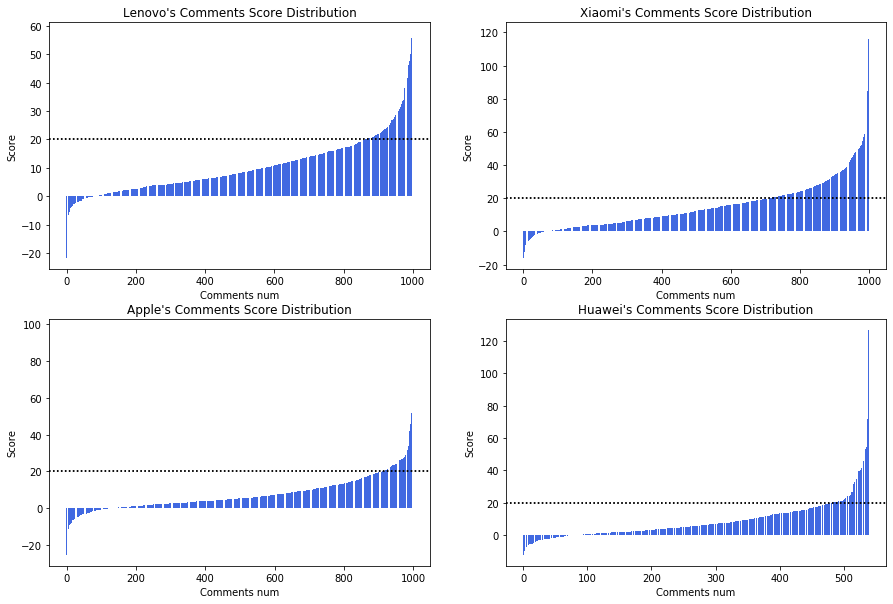

In [8]:
# 图形展示——得分图
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,10))

def plotscore(a,b,name_string):
    x = np.arange(b-a)
    y = df_comments["scores"][a:b].sort_values()
    plt.bar(x, y,color='royalblue')
    plt.ylabel("Score")
    plt.xlabel("Comments num")
    plt.title(name_string+"'s Comments Score Distribution")
    plt.axhline(y=20, color="black", linestyle=":",lw=1.5)
    plt.axhline(y=20, color="black", linestyle=":",lw=1.5)

# 联想 0-999
plt.subplot(2,2,1)
plotscore(0,999,"Lenovo")
# 小米 1000-1999
plt.subplot(2,2,2)
plotscore(1000,1999,"Xiaomi")
# 苹果 2000-2998
plt.subplot(2,2,3)
plotscore(2000,2998,"Apple")
# 华为 2999-3539
plt.subplot(2,2,4)
plotscore(2999,3539,"Huawei")

In [9]:
# 打印分数最高和最低两组评论
def print_comment(category,num):
    for i in range(num):
        if category == "low":
            category_low = df_comments["scores"].sort_values()[:num]  
            l = category_low.index[i]
            print("low"+"["+str(i+1)+"]:"+str(df_comments["scores"][l])+" "+df_comments["content"][l].replace(" ","")+"\n")
        else:
            category_high = df_comments["scores"].sort_values()[-num:]  
            h = category_high.index[i]
            print("high"+"["+str(i+1)+"]:"+str(df_comments["scores"][h])+" "+df_comments["content"][h].replace(" ","")+"\n")

print_comment("low",2)
print_comment("high",2)

low[1]:-25.307 再也不会来京东买东西了充满电看电视剧小时编辑视频小时连续死机只能强制重启电脑机身热烫手没事风扇响声音大嗡嗡嗡垃圾垃圾垃圾客服垃圾退差价扣除赠品钱垃圾垃圾垃圾垃圾

low[2]:-24.979 下单签收发现了故障问题电池用到了会突然关机也就是说电池容量决定退回去换货说是笔记本检修天无力吐槽京东失望apple售后失望明显大问题小时能检测到问题直接换新不就行了吗需要监测欺负消费者了吧有消费者考虑吗星不想辣鸡京东买macbookpro收到货后发现电池用到关机黑屏发现质量问题换货磨磨蹭蹭了说重装了系统修好了硬件方面没问题不予换货到处理好坑惨了

high[1]:119.368 运行速度很流畅屏幕效果色域能轻薄程度不错哦外形外观适合质量好卖家描述完全一致满意很喜欢收到了包装会买用着不错产品相满意好很不错搞活动买到不错习惯了觉得着包装完整使用过评价效果发货速度快包装仔细严实物流公司服务态度好运送速度很满意购物不错正品活动优惠性价比超高送东西好买会买用着不错产品满意好很不错效果好会买不错用起来好设计合理值得拥有宝贝早收到了好喜欢活动买超好超实惠谢谢啦好评

high[2]:126.8 运行速度运行速度行新机固态不行知道评论了屏幕效果屏幕是一大亮点显示很舒服色域有特色有特色而已性价比高肉眼分辨明显拿设备对比会感觉出来显得艳丽散热性能笔记本吐糟点金属散热烫手煎鸡蛋敢说烫告诉原因吧开机烫安装软件煎鸡蛋是散热性铜管打风扇风量不行外形外观外观是唯一比较满意全金属摸着看着说服很爽轻薄程度厚重起来没什么特点唯一特点金属牌子超薄金属呢特色买本子请注意选择不要支持国产爱国买华为支持国产支持华为品牌感觉后悔买华为说购买体验吧官方宣传页面上期分期免息进去免息购买降价京东好帮解决了这两点不错笔记本天到是买店看中京东物流特地京东购买买来是国产系统软件小游戏无法使用只能装微软送了u盘要笔记本收货有维修请看追评华为要小加装固态不能自己动手动手华为官方解释影响售后意思加无售后了联系当地华为维修点站点说没有华为笔记本拆机权限无法帮忙加装固态维修点是华为客服介绍只能邮寄到外地加装固态邮寄费用是免了特地官方电话客服咨询加装是否收费还好有聊天记录拆机费用黑黑hellip加装不了华为加装非要收费邮寄问了需要提供固态吗说是没有邮寄电源线固态固定支架收到说没有固态支架电源线无法加装要邮寄回来定配

In [10]:
df_comments.to_csv("df_comments_sentiment_results.csv",encoding="utf_8_sig",index = False) 

# 二、基于机器学习方法的情感分析

需要提前安装的包：numpy,pandas,jieba,gensim,sklearn

1.支持向量机模型 

2.朴素贝叶斯模型

In [11]:
import jieba
import numpy as np
import pandas as pd

### 2.1 语料库预处理

In [12]:
# 读入正负面情绪语料库
neg = pd.read_csv("negtive.csv",header=None)
pos = pd.read_csv("positive.csv",header=None)

In [13]:
# 对语料库进行预处理
# 去除标点函数
def punc(string):
    import re
    from string import punctuation
    punc = punctuation+u'《》？，！“”#.,;《》？！“”‘’@￥%…&×（）——+【】{};；●。&～、|\s:：'
    string=re.sub("[{}]".format(punc), "", string) 
    return string

In [14]:
pos[0]=pos[0].apply(punc)
neg[0]=neg[0].apply(punc)

In [15]:
pos

,0
0,很不错很好的平板
1,帮同学买的同学说感觉挺好质量也不错
2,东西不错一看就是正品包装还没有开机相信京东都是老顾客还是京东值得信赖给五星好评
3,总体而言产品还是不错的
4,好不错真的很好不错
...,...
8156,外观漂亮做工优秀键盘手感很好功能齐全配置满足一般娱乐办公led屏幕ddr3都是比较主流的配置...
8157,性价比够好外观够漂亮性能够用了牌子够大了我心够舒服了
8158,今天刚到手只能大概说一下第一感觉配置不错对得其这个价位性价比不错第二本挺漂亮蓝牙模块我也喜欢
8159,个人觉得配置属于中高端CPU级别高内存大音响效果不错笔记本外观比较时尚键盘制作较精良独立显卡...


In [23]:
# jieba分词
neg["words"] = neg[0].apply(lambda x:jieba.lcut(x))
pos["words"] = pos[0].apply(lambda x:jieba.lcut(x))

In [24]:
neg["words"]

0       [京东, 才, 发现, 你, 是, 个, 骗子, 服务, 更是, 一样, 的, 烂, 客服,...
1        [好不容易, 在, 网上, 买手机, 回来, 充电器, 是, 坏, 的, 诶, 没, 谁, 了]
2       [我, 才, 买, 两天, 就, 降价, 什么, 鬼, 差评, 我, 一颗, 星, 都, 不...
3       [快递, 服务态度, 很, 好, 折开, 看, 就是, 没有, 发票, 联系, 服务, 说,...
4                        [用, 了, 一个月, 机子, 就, 很, 卡, 真心, 垃圾]
                              ...                        
8149    [系统, 驱动, 确实, 很烦, 网站, 好像, 还, 不是, 很全, 这个, 多多少少, ...
8150    [键盘, 很, 好看, 但是, 打字, 还是, 觉得, 别扭, 方向键, 太小, 目前, 还...
8151    [昨天, 垫, 了, 个, 键盘, 膜, 改天, 再, 去, 贴个, 屏保, 要是, 这些,...
8152    [系统, 系统, 啊, 中午, 收到, 货找, 同事, 装没装, 好, 跑, 到, 售后, ...
8153    [刚刚, 拿到, 机器, 开, 了, 好, 几次, 机, 就是, 启动, 不了, 进不了, ...
Name: words, Length: 8154, dtype: object

In [25]:
# 合并正负面分词数组
x = np.concatenate((pos["words"],neg["words"]))
# 创建向量空间
num_one = np.ones(len(pos))
num_zero = np.zeros(len(neg))
y = np.concatenate((num_one,num_zero))

In [26]:
from gensim.models.word2vec import Word2Vec

# w2v = word2vec.Word2Vec(x,size=500, min_count=20) 

# 初始化高维向量空间  200个维度(神经网络的隐藏层的单元数) <30次丢弃
w2v = Word2Vec(size=200,min_count=30,workers=1)
# 创建词汇表
w2v.build_vocab(x)
# 训练模型得词向量
w2v.train(x,total_examples=w2v.corpus_count,epochs=w2v.iter)

# 将句子中的所有词向量相加
def total_vec(words):
    vec = np.zeros(200).reshape((1,200))
    for word in words:
        try:
            vec += w2v.wv[word].reshape((1,200))
        except KeyError:
            continue
    return vec

/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # Remove the CWD from sys.path while we load stuff.


In [27]:
# 得到最终训练模型数据集
train_vec = np.concatenate([total_vec(words) for words in x]) 

In [28]:
vec = np.zeros(200)
vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
train_vec

array([[-2.64121631,  1.22259167,  0.28822523, ..., -0.13359874,
        -0.58672559,  1.12956235],
       [-4.13476278,  1.92833052,  0.39716037, ..., -0.73178472,
        -1.51429514,  0.11709711],
       [-8.07716082,  5.1600246 ,  2.34809783, ...,  1.60342681,
        -3.68066093, -0.28399541],
       ...,
       [-2.61341173,  3.05272615, 12.02622582, ...,  5.11556869,
        -5.50778236, -1.8207763 ],
       [-6.93065533,  5.08356471, 11.88646876, ...,  4.00529325,
        -3.10619989, -1.72707603],
       [ 0.32493887,  1.87086311,  6.44278439, ...,  3.30300268,
        -2.20333307, -0.48672715]])

In [30]:
len(train_vec)

16315

In [31]:
len(train_vec[1])

200

### 2.2 支持向量机

In [32]:
from sklearn import svm

# SVM模型初始化
svm_model = svm.SVC(kernel="rbf")
# 训练SVM模型(需要几分钟时间)
svm_model.fit(train_vec,y)

/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
# 导入经过预处理的分词结果
comments = pd.read_table("分词结果.txt",header = None)
comments.columns=["content"]
comments

,content
0,老公 给买 礼物 外观 大气 开关机 速度 运行 速度 着 满意 包装 完好 物流 力
1,运行 速度 快 屏幕 效果 一般
2,运行 速度 快 不错
3,京东 服务 好 京东 买手机 电脑 都行 让 失望 电脑 配置 强悍 是 内存 大 存 空间...
4,运行 速度 散热 一般 买来 开机 挺快 s 软件 安装 了 变成 s 了 屏幕显示 效果 ...
...,...
3534,F2 键 好 硬 要用 大力 才能 还有 键 是 差 评 菊花 粉 失望 透 了 散热 性能...
3535,特色 下单 显示 有 赠品 到货 没了 差 评 有史以来
3536,知道 差 评 了 吧 不同 时间 不同 活动 不同 心情 不同 评价
3537,电流 声 前无古人 后无来者 京东 差 评


In [34]:
# SVM模型预测
comment_sentiment=[]
for comment in comments["content"]:
    words = comment.split(" ")
    words_vec = total_vec(words)
    result = svm_model.predict(words_vec)
    comment_sentiment.append("积极" if result[0]==1 else "消极")

In [35]:
comments["svm_sentiment"]= comment_sentiment
comments

,content,svm_sentiment
0,老公 给买 礼物 外观 大气 开关机 速度 运行 速度 着 满意 包装 完好 物流 力,积极
1,运行 速度 快 屏幕 效果 一般,积极
2,运行 速度 快 不错,积极
3,京东 服务 好 京东 买手机 电脑 都行 让 失望 电脑 配置 强悍 是 内存 大 存 空间...,积极
4,运行 速度 散热 一般 买来 开机 挺快 s 软件 安装 了 变成 s 了 屏幕显示 效果 ...,积极
...,...,...
3534,F2 键 好 硬 要用 大力 才能 还有 键 是 差 评 菊花 粉 失望 透 了 散热 性能...,积极
3535,特色 下单 显示 有 赠品 到货 没了 差 评 有史以来,消极
3536,知道 差 评 了 吧 不同 时间 不同 活动 不同 心情 不同 评价,消极
3537,电流 声 前无古人 后无来者 京东 差 评,消极


### 2.3 朴素贝叶斯

In [36]:
from sklearn.naive_bayes import GaussianNB
# 高斯贝叶斯模型
bayes_model = GaussianNB()#默认priors=None
bayes_model.fit(train_vec, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
# bayes模型
comment_sentiment_bayes=[]
for comment in comments["content"]:
    words = comment.split(" ")
    words_vec = total_vec(words)
    result = bayes_model.predict(words_vec)
    comment_sentiment_bayes.append("积极" if int(result[0]) else "消极")

In [38]:
comments["bayes_sentiment"]= comment_sentiment_bayes
comments

,content,svm_sentiment,bayes_sentiment
0,老公 给买 礼物 外观 大气 开关机 速度 运行 速度 着 满意 包装 完好 物流 力,积极,积极
1,运行 速度 快 屏幕 效果 一般,积极,积极
2,运行 速度 快 不错,积极,积极
3,京东 服务 好 京东 买手机 电脑 都行 让 失望 电脑 配置 强悍 是 内存 大 存 空间...,积极,积极
4,运行 速度 散热 一般 买来 开机 挺快 s 软件 安装 了 变成 s 了 屏幕显示 效果 ...,积极,积极
...,...,...,...
3534,F2 键 好 硬 要用 大力 才能 还有 键 是 差 评 菊花 粉 失望 透 了 散热 性能...,积极,积极
3535,特色 下单 显示 有 赠品 到货 没了 差 评 有史以来,消极,积极
3536,知道 差 评 了 吧 不同 时间 不同 活动 不同 心情 不同 评价,消极,积极
3537,电流 声 前无古人 后无来者 京东 差 评,消极,积极


In [39]:
# 打印结果中积极和消极情绪的数量
def senti_num(modelname,comments):
    p=0
    ng=0
    for senti in comments:
        if senti == "积极":
            p = p+1
        else:
            ng = ng+1
    print(modelname+"模型中"+"\n积极情绪的数量为："+ str(p) +"\n消极情绪的数量为："+ str(ng))
#支持向量机
senti_num("svm",comments["svm_sentiment"])
#朴素贝叶斯
senti_num("bayes",comments["bayes_sentiment"])

svm模型中
积极情绪的数量为：2304
消极情绪的数量为：1235
bayes模型中
积极情绪的数量为：3169
消极情绪的数量为：370


In [40]:
# 情感词典方法与机器学习方法结果合并
comments["df_scores"]=df_comments["scores"]

score_senti=[]
for comment in comments["df_scores"]:
    if float(comment) >= 0:
        score_senti.append("积极")
    else:
        score_senti.append("消极")
comments["df_score_senti"]=score_senti
comments

,content,svm_sentiment,bayes_sentiment,df_scores,df_score_senti
0,老公 给买 礼物 外观 大气 开关机 速度 运行 速度 着 满意 包装 完好 物流 力,积极,积极,15.314,积极
1,运行 速度 快 屏幕 效果 一般,积极,积极,2.569,积极
2,运行 速度 快 不错,积极,积极,3.953,积极
3,京东 服务 好 京东 买手机 电脑 都行 让 失望 电脑 配置 强悍 是 内存 大 存 空间...,积极,积极,16.950,积极
4,运行 速度 散热 一般 买来 开机 挺快 s 软件 安装 了 变成 s 了 屏幕显示 效果 ...,积极,积极,10.607,积极
...,...,...,...,...,...
3534,F2 键 好 硬 要用 大力 才能 还有 键 是 差 评 菊花 粉 失望 透 了 散热 性能...,积极,积极,13.509,积极
3535,特色 下单 显示 有 赠品 到货 没了 差 评 有史以来,消极,积极,3.932,积极
3536,知道 差 评 了 吧 不同 时间 不同 活动 不同 心情 不同 评价,消极,积极,1.226,积极
3537,电流 声 前无古人 后无来者 京东 差 评,消极,积极,2.136,积极


In [41]:
# 统计情感词典方法中积极情绪与消极情绪的数量
senti_num("情感词典",comments["df_score_senti"])

情感词典模型中
积极情绪的数量为：3180
消极情绪的数量为：359


In [42]:
comments.to_csv("comments_sentiment_results.csv",encoding="utf_8_sig",index = False) 

###  2.4 作业二：实现Xgboost

Xgboost目前是各大企业分类算法的宠儿，其python包的使用较简单、明了、成熟，前面我们也给出了它的一个基本思想，下面希望同学们使用正负向情感语料(‘negative.csv’,’positive.csv’)(分成训练集和测试集(七三分)，再将训练集分成训练集和验证集(八二分)，用Word2Vec生成文本向量)、结合Xgboost的两篇论文和网上的代码(数据和论文在作业大礼包中,网上代码：https://www.cnblogs.com/LHWorldBlog/p/9195623.html，https://blog.csdn.net/u011630575/article/details/794181 等)，训练Xgboost分类器。给出训练分类器时每次迭代的训练集和验证集上的错误率，以及最终在测试集上的准确率、召回率、精确率。

#xgboost 有封装好的分类器和回归器，可以直接用XGBRegressor建立模型（from xgboost import XGBRegressor）

###  2.5 作业三：模型比较

对文件中的正面情绪语料集（positive.csv）与负面情绪语料集（negtive.csv）进行预处理，将80%划分为训练集，20%划分为测试集，运用SVM模型和朴素贝叶斯模型对测试集分别进行预测，分别计算预测结果的准确率、精确率和召回率，并绘制ROC曲线。

Tips：绘制ROC曲线时，可使用sklearn.metrics中的roc_curve和auc进行画图，训练模型和预测时使用predict_proba得到概率结果。

# 三、基于深度学习方法的情感分析 

（基于keras框架）

tensorflow请安装1.13.1版本（tensorflow==1.13.1），否则版本过高将导致无法与keras兼容

由于tensorflow不支持python3.6以上版本，在安装之前请先自行查看python版本，需降至3.6及以下。方法为在Anaconda Prompt中键入conda uninstall python=3.6（由于不同系统操作流程不同，这只是一种操作方法）

### 模型训练阶段：
### 3.1语料库预处理

#### 3.1.1语料库标签化tokensize  

In [43]:
# 文本数据处理（转变为rnn模型可用格式）
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chenyuhao/Library/P

In [44]:
# 词向量长度——每个词都对应一个长度为200的向量
embedding_dim=len(w2v["很"])
embedding_dim

/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


200

In [45]:
#(题外)计算两个词的相似度
w2v.similarity("满意","喜欢")

/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


0.87076074

In [46]:
#(题外)找出最相近的词,利用余弦相似度
w2v.most_similar(["贵"],topn=10)

/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('值', 0.9397769570350647),
 ('不值', 0.9342119693756104),
 ('价钱', 0.9326287508010864),
 ('毕竟', 0.9301973581314087),
 ('对得起', 0.9267153739929199),
 ('实惠', 0.9183377027511597),
 ('几百块', 0.8913952708244324),
 ('一分货', 0.8771758079528809),
 ('算是', 0.876150369644165),
 ('本本', 0.872441828250885)]

In [47]:
# 训练语料pos[0]&neg[0] 含有8161条正面评论，8154条负面评论
# 前面已经进行过分词与合并语料 x
#len(x)
texts_org=x.tolist()

In [48]:
# 将评论索引化tokenize：将评论中的词转换为word2vec中的索引index
texts_tokens=[]
for text in texts_org:
    for i,word in enumerate(text):
        try:
            text[i]=w2v.wv.vocab[word].index
        except KeyError:
            text[i]=0
    texts_tokens.append(text)

In [49]:
texts_tokens

[[2, 8, 2, 10, 0, 29],
 [450, 1493, 12, 0, 1493, 22, 30, 76, 10, 78, 5, 8],
 [39,
  8,
  828,
  25,
  577,
  177,
  11,
  14,
  175,
  401,
  19,
  13,
  3,
  553,
  1185,
  27,
  19,
  211,
  481,
  21,
  1239,
  385],
 [0, 140, 27, 8, 0],
 [10, 8, 123, 2, 10, 8],
 [2, 10, 1366, 8, 76, 66, 0, 9, 1, 421, 58, 141, 227, 0],
 [177, 49, 2, 10, 272, 0, 1, 4, 0, 0, 0, 0, 523, 0, 11, 18],
 [328,
  128,
  9,
  26,
  16,
  168,
  8,
  143,
  0,
  29,
  541,
  0,
  726,
  475,
  448,
  1037,
  1,
  178,
  30,
  11,
  8,
  762,
  5,
  15,
  1080,
  0,
  54,
  34,
  0,
  813,
  0,
  10,
  299,
  0,
  128,
  13,
  9,
  26,
  16,
  712,
  9,
  135,
  13,
  8,
  79,
  3,
  880,
  9,
  331,
  16,
  9,
  1080,
  4,
  13,
  9,
  26,
  9,
  439,
  1,
  392,
  5,
  0,
  76,
  66,
  0,
  658,
  0,
  0,
  134,
  25,
  14,
  150,
  976,
  0,
  713,
  105,
  1409,
  59],
 [1456,
  38,
  66,
  33,
  3,
  904,
  738,
  0,
  328,
  60,
  0,
  0,
  0,
  73,
  54,
  0,
  814,
  0,
  687,
  31,
  281,
  1129,
  0,


In [50]:
len(texts_tokens)

16315

In [51]:
# 获得所有tokens的长度
num_tokens = [len(tokens) for tokens in texts_tokens]
num_tokens = np.array(num_tokens)
# num_tokens

In [52]:
# 计算平均tokens的长度/最长评价的长度
# np.mean(num_tokens)
np.max(num_tokens)

557

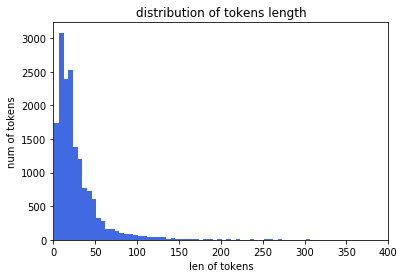

In [53]:
# 图形展示——tokens长度的分布情况
import matplotlib.pyplot as plt
plt.hist(num_tokens,bins = 100,color = "royalblue")
plt.xlim((0,400))
plt.ylabel("num of tokens")
plt.xlabel("len of tokens")
plt.title("distribution of tokens length")
plt.show()

In [54]:
# 正态分布的时候根据3-Sigma，计算平均值加二倍标准差，预计可覆盖95%以上的范围(98)
max_tokens = int(np.mean(num_tokens) + 2 * np.std(num_tokens))
# max_tokens
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9668403309837573

In [55]:
# 填充和修剪 padding & truncation 以保持所有tokens的长度相等=98
# 过多会浪费计算资源，过少会影响模型效果
texts_pad = pad_sequences(texts_tokens , maxlen = max_tokens,
                          padding = "pre", truncating = "pre")

In [56]:
# 超过字典长度的词用0代替（选用的词中没有）
texts_pad[texts_pad >= len(w2v.wv.vocab)] = 0

In [57]:
texts_pad

array([[   0,    0,    0, ...,   10,    0,   29],
       [   0,    0,    0, ...,   78,    5,    8],
       [   0,    0,    0, ...,   21, 1239,  385],
       ...,
       [   0,    0,    0, ..., 1125,   69,   59],
       [   0,    0,    0, ...,   59,  158, 1107],
       [   0,    0,    0, ...,    3,   44,  444]], dtype=int32)

#### 3.1.2 构建Embedding Matrix

keras要求准备一个维度为（num_words,embedding_dim)的矩阵，num_words表示使用的词汇数量（使用的词典中的词汇的数量），embedding_dim表示维度，即每一个词语都用一个长度为embedding_dim的向量表示

In [58]:
embedding_dim = 200
num_words = len(w2v.wv.vocab)

In [59]:
# 矩阵初始化（1681*200）
embedding_matrix = np.zeros((num_words, embedding_dim))
# 矩阵赋值得到词嵌入矩阵
for i in range(num_words):
    embedding_matrix[i:] = w2v[w2v.wv.index2word[i]]
embedding_matrix = embedding_matrix.astype("float32")

/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [60]:
# 检验是否词嵌入矩阵是否与词嵌入模型的向量一一对应
# 返回true的个数
np.sum(w2v[w2v.wv.index2word[444]] == embedding_matrix[444])

/Users/chenyuhao/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


200

In [61]:
embedding_matrix.shape

(1681, 200)

####  3.1.3 训练集与测试集构建

In [62]:
len(neg[0])

8154

In [63]:
# 情感标签y：前8161个为1，后8154个为0
from sklearn.model_selection import train_test_split
# 分割训练集和测试集合,90-10
x_train,x_test,y_train,y_test = train_test_split(texts_pad,y,
                                                test_size=0.1,
                                                random_state=12)

In [64]:
len(x_train)
# len(texts_pad)*0.9

14683

### 3.2 RNN模型构建和训练

In [65]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [66]:
# 构建rnn模型
rnn_model = Sequential()
# 1.词嵌入层
rnn_model.add(Embedding(num_words, embedding_dim,
                    weights = [embedding_matrix],
                   input_length = max_tokens,
                   trainable = False))
# 随机失活 0.2～0.5
rnn_model.add(Dropout(0.35))

Instructions for updating:
Colocations handled automatically by placer.


In [67]:
# 2.一层RNN
rnn_model.add(SimpleRNN(32))
rnn_model.add(Dropout(0.35))
# 3.输出层
rnn_model.add(Dense(1, activation = 'sigmoid'))
# 定义优化器，损失函数，训练效果中计算准确率
rnn_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy",metrics = ['acc'])

In [68]:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 98, 200)           336200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 200)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                7456      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 343,689
Trainable params: 7,489
Non-trainable params: 336,200
_________________________________________________________________


In [69]:
history = rnn_model.fit(x_train, y_train, batch_size = 200, epochs = 20, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 14683 samples, validate on 1632 samples
Epoch 1/20
14683/14683 [==============================] - 4s 264us/step - loss: 0.5685 - acc: 0.7091 - val_loss: 0.5830 - val_acc: 0.7433
Epoch 2/20
14683/14683 [==============================] - 4s 242us/step - loss: 0.4772 - acc: 0.7949 - val_loss: 0.4057 - val_acc: 0.8339
Epoch 3/20
14683/14683 [==============================] - 4s 243us/step - loss: 0.4442 - acc: 0.8186 - val_loss: 0.3788 - val_acc: 0.8542
Epoch 4/20
14683/14683 [==============================] - 4s 243us/step - loss: 0.4314 - acc: 0.8245 - val_loss: 0.4003 - val_acc: 0.8413
Epoch 5/20
14683/14683 [==============================] - 4s 249us/step - loss: 0.4184 - acc: 0.8321 - val_loss: 0.3670 - val_acc: 0.8566
Epoch 6/20
14683/14683 [==============================] - 4s 244us/step - loss: 0.4483 - acc: 0.8156 - val_loss: 0.3736 - val_acc: 0.8566
Epoch 7/20
14683/14683 [==============================] - 4s 246us/step - l

In [70]:
# 直观展示——准确率和损失图函数
def accloss_graph(pre_history):
    acc = pre_history.history["acc"]
    val_acc = pre_history.history["val_acc"]
    loss = pre_history.history["loss"]
    val_loss = pre_history.history["val_loss"]
    # 迭代次数
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (20,5))

    # 准确率
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, "b", label = "Training Acc",color = "grey")
    plt.plot(epochs, val_acc, "b", label = "Test Acc",color = "royalblue")
    plt.title("Training and Test Accuracy")
    plt.legend(loc = 4)

    # 损失
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, "b", label = "Training Loss",color = "grey")
    plt.plot(epochs, val_loss, "b", label = "Test Loss",color = "royalblue")
    plt.title("Training and Test Loss")
    plt.legend(loc = 1)

    plt.show()

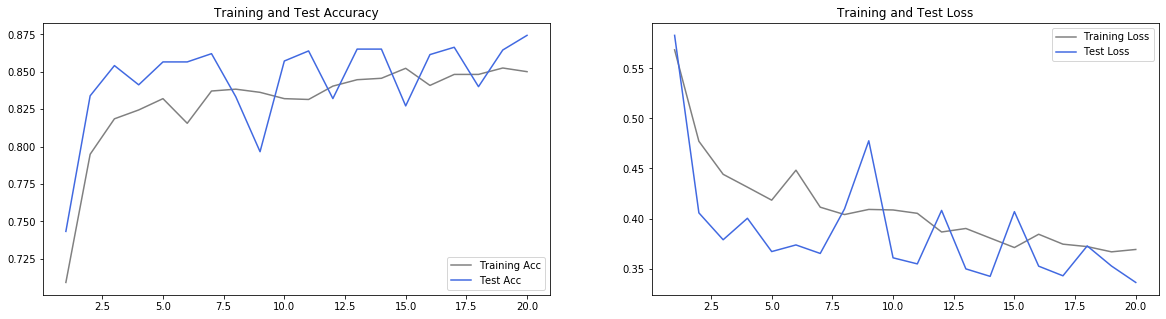

In [71]:
accloss_graph(history)

In [72]:
# 由于RNN特有的memory会影响后期其他的RNN的特点，梯度时大时小，learning rate没法个性化的调整
# 导致RNN在训练的过程中，Loss是震荡起伏的

In [73]:
# 对准确率引入early stopping
# 每个epoch之后获取val_acc结果，不再改善时停止训练
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_acc",patience=5)  

In [74]:
# 构建rnn模型
es_rnn_model = Sequential()
# 1.词嵌入层
es_rnn_model.add(Embedding(num_words, embedding_dim,
                    weights = [embedding_matrix],
                   input_length = max_tokens,
                   trainable = False))
es_rnn_model.add(Dropout(0.35))

In [75]:
# 2.一层RNN
es_rnn_model.add(SimpleRNN(32))
es_rnn_model.add(Dropout(0.35))
# 3.输出层
es_rnn_model.add(Dense(1, activation = 'sigmoid'))

es_rnn_model.compile(optimizer = "rmsprop", loss = "binary_crossentropy",metrics = ['acc'])

In [76]:
es_history = es_rnn_model.fit(x_train, y_train, batch_size = 200, epochs = 20, 
                           validation_data = (x_test, y_test),
                           callbacks=[early_stopping])

Train on 14683 samples, validate on 1632 samples
Epoch 1/20
14683/14683 [==============================] - 4s 266us/step - loss: 0.5759 - acc: 0.7041 - val_loss: 0.3849 - val_acc: 0.8474
Epoch 2/20
14683/14683 [==============================] - 4s 246us/step - loss: 0.4573 - acc: 0.8103 - val_loss: 0.3865 - val_acc: 0.8493
Epoch 3/20
14683/14683 [==============================] - 4s 246us/step - loss: 0.4420 - acc: 0.8192 - val_loss: 0.3934 - val_acc: 0.8499
Epoch 4/20
14683/14683 [==============================] - 4s 247us/step - loss: 0.4249 - acc: 0.8312 - val_loss: 0.3840 - val_acc: 0.8487
Epoch 5/20
14683/14683 [==============================] - 4s 249us/step - loss: 0.4192 - acc: 0.8316 - val_loss: 0.6269 - val_acc: 0.7335
Epoch 6/20
14683/14683 [==============================] - 4s 257us/step - loss: 0.4315 - acc: 0.8233 - val_loss: 0.3854 - val_acc: 0.8517
Epoch 7/20
14683/14683 [==============================] - 4s 245us/step - loss: 0.4236 - acc: 0.8301 - val_loss: 0.4187 - v

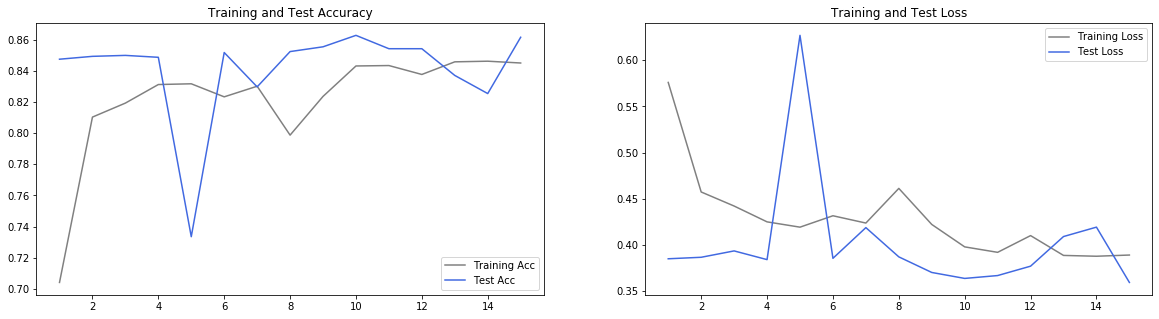

In [77]:
# 直观展示——加了early stopping之后的准确率和损失图
accloss_graph(es_history)

In [78]:
# 迭代到第15次时停止，patience设置为5，说明在第10次之后，val_acc就基本没有改善

### 3.3 模型预测

In [79]:
# 导入需预测的评论
# 导入经过预处理的分词结果
texts_predict = []
for comment in comments["content"]:
    words = comment.split(" ")
    texts_predict.append(words)

In [80]:
# 将评论索引化tokenize：将评论中的词转换为word2vec中的索引index
texts_predict_tokens = []
for text in texts_predict:
    for i,word in enumerate(text):
        try:
            text[i] = w2v.wv.vocab[word].index
        except KeyError:
            text[i] = 0
    texts_predict_tokens.append(text)

In [81]:
# padding & truncation
texts_predict_pad = pad_sequences(texts_predict_tokens , maxlen=98,
                          padding = "pre", truncating = "pre")
# 超过字典长度的词用0代替（选用的词中没有）
texts_predict_pad[texts_predict_pad >= len(w2v.wv.vocab)] = 0

In [82]:
texts_predict_pad

array([[  0,   0,   0, ..., 137, 694,   0],
       [  0,   0,   0, ...,  72,  99,   0],
       [  0,   0,   0, ...,  67,   8,   0],
       ...,
       [  0,   0,   0, ..., 846, 227,   0],
       [  0,   0,   0, ..., 104,   0,   0],
       [  0,   0,   0, ..., 104,   0,   0]], dtype=int32)

In [83]:
# 预测
predict_results = rnn_model.predict_classes(texts_predict_pad)

In [84]:
comments["rnn_results"] = predict_results
# 将1/0结果转换为积极消极
rnn_senti = []
for result in comments["rnn_results"]:
    if result == 1:
        rnn_senti.append("积极")
    else:
        rnn_senti.append("消极")
comments["rnn_results"] = rnn_senti
comments

,content,svm_sentiment,bayes_sentiment,df_scores,df_score_senti,rnn_results
0,老公 给买 礼物 外观 大气 开关机 速度 运行 速度 着 满意 包装 完好 物流 力,积极,积极,15.314,积极,积极
1,运行 速度 快 屏幕 效果 一般,积极,积极,2.569,积极,积极
2,运行 速度 快 不错,积极,积极,3.953,积极,积极
3,京东 服务 好 京东 买手机 电脑 都行 让 失望 电脑 配置 强悍 是 内存 大 存 空间...,积极,积极,16.950,积极,积极
4,运行 速度 散热 一般 买来 开机 挺快 s 软件 安装 了 变成 s 了 屏幕显示 效果 ...,积极,积极,10.607,积极,积极
...,...,...,...,...,...,...
3534,F2 键 好 硬 要用 大力 才能 还有 键 是 差 评 菊花 粉 失望 透 了 散热 性能...,积极,积极,13.509,积极,积极
3535,特色 下单 显示 有 赠品 到货 没了 差 评 有史以来,消极,积极,3.932,积极,消极
3536,知道 差 评 了 吧 不同 时间 不同 活动 不同 心情 不同 评价,消极,积极,1.226,积极,消极
3537,电流 声 前无古人 后无来者 京东 差 评,消极,积极,2.136,积极,消极


In [85]:
senti_num("RNN",comments["rnn_results"])

RNN模型中
积极情绪的数量为：2522
消极情绪的数量为：1017


In [86]:
# BiRNN LSTM GRU

In [87]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(num_words, embedding_dim,
                    weights = [embedding_matrix],
                   input_length = max_tokens,
                   trainable = False))
lstm_model.add(Dropout(0.35))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.35))
lstm_model.add(Dense(1,activation='sigmoid'))

lstm_model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


In [88]:
lstm_history = lstm_model.fit(x_train, y_train,
                   epochs = 20,
                   batch_size=200,
                   validation_data = (x_test, y_test))

Train on 14683 samples, validate on 1632 samples
Epoch 1/20
14683/14683 [==============================] - 7s 445us/step - loss: 0.4682 - acc: 0.7862 - val_loss: 0.3834 - val_acc: 0.8425
Epoch 2/20
14683/14683 [==============================] - 6s 420us/step - loss: 0.3756 - acc: 0.8465 - val_loss: 0.3453 - val_acc: 0.8615
Epoch 3/20
14683/14683 [==============================] - 6s 436us/step - loss: 0.3528 - acc: 0.8572 - val_loss: 0.3480 - val_acc: 0.8572
Epoch 4/20
14683/14683 [==============================] - 6s 432us/step - loss: 0.3409 - acc: 0.8583 - val_loss: 0.3270 - val_acc: 0.8719
Epoch 5/20
14683/14683 [==============================] - 6s 436us/step - loss: 0.3216 - acc: 0.8671 - val_loss: 0.3239 - val_acc: 0.8781
Epoch 6/20
14683/14683 [==============================] - 7s 447us/step - loss: 0.3157 - acc: 0.8729 - val_loss: 0.3093 - val_acc: 0.8848
Epoch 7/20
14683/14683 [==============================] - 7s 445us/step - loss: 0.3065 - acc: 0.8770 - val_loss: 0.3258 - v

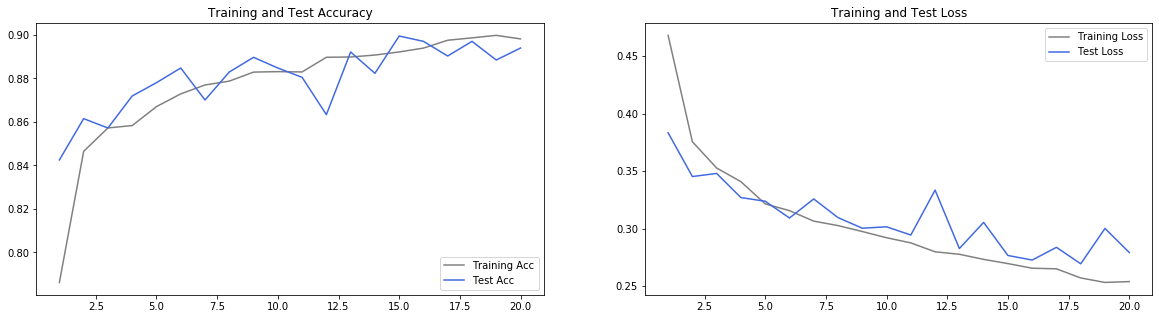

In [89]:
# 直观展示——lstm的准确率和损失图
accloss_graph(lstm_history)